## Sadna

### imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [5]:
sensor_df = pd.read_csv("cow_sensor_data.csv", parse_dates=["timestamp"], dayfirst=True)
cow_info_df = pd.read_csv("cow_details.csv")


# EDA

In [6]:
print(sensor_df.info())
print(sensor_df.describe())
print(sensor_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cow_id                   55000 non-null  int64         
 1   timestamp                55000 non-null  datetime64[ns]
 2   location_lat             55000 non-null  float64       
 3   location_lon             55000 non-null  float64       
 4   movement_activity        53900 non-null  float64       
 5   head_movement_intensity  53900 non-null  float64       
 6   heart_rate               53900 non-null  float64       
 7   vocalization_rate        53900 non-null  float64       
 8   earthquake_detected      55000 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 3.8 MB
None
             cow_id                      timestamp  location_lat  \
count  55000.000000                          55000  55000.000000   
mean      2

In [7]:
print(sensor_df.isnull().sum()) # check for nulls


cow_id                        0
timestamp                     0
location_lat                  0
location_lon                  0
movement_activity          1100
head_movement_intensity    1100
heart_rate                 1100
vocalization_rate          1100
earthquake_detected           0
dtype: int64


# histogram before filling empty values

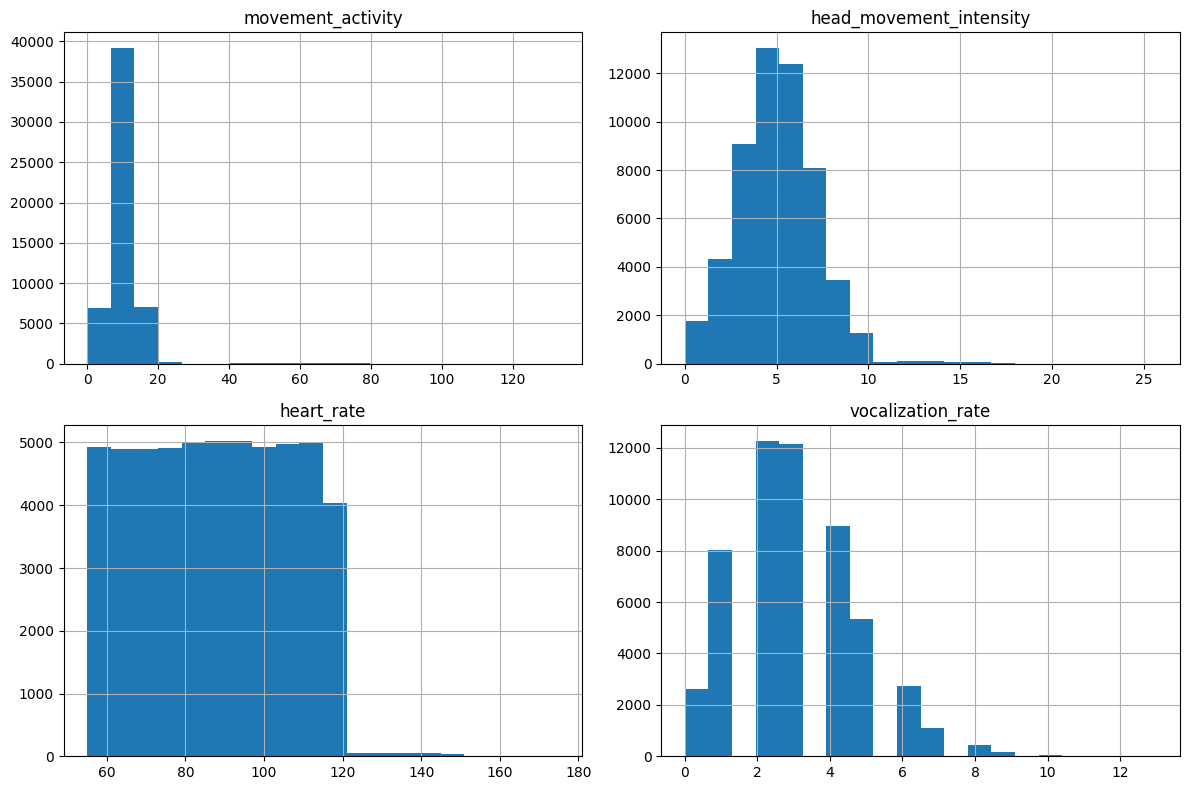

In [8]:
columns_to_plot = sensor_df.drop(columns=["cow_id","timestamp", "location_lat", "location_lon","earthquake_detected"]).select_dtypes(include="number")

columns_to_plot.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

In [9]:
sensor_df = ( # filling empty rows with backword and forward filling for each cow id
    sensor_df.groupby('cow_id', group_keys=False)
    .apply(lambda g: g.ffill().bfill())
    .reset_index(drop=True)
)

C:\Users\SigalPC\AppData\Local\Temp\ipykernel_21712\934417226.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.ffill().bfill())


# histograms after filling empty values

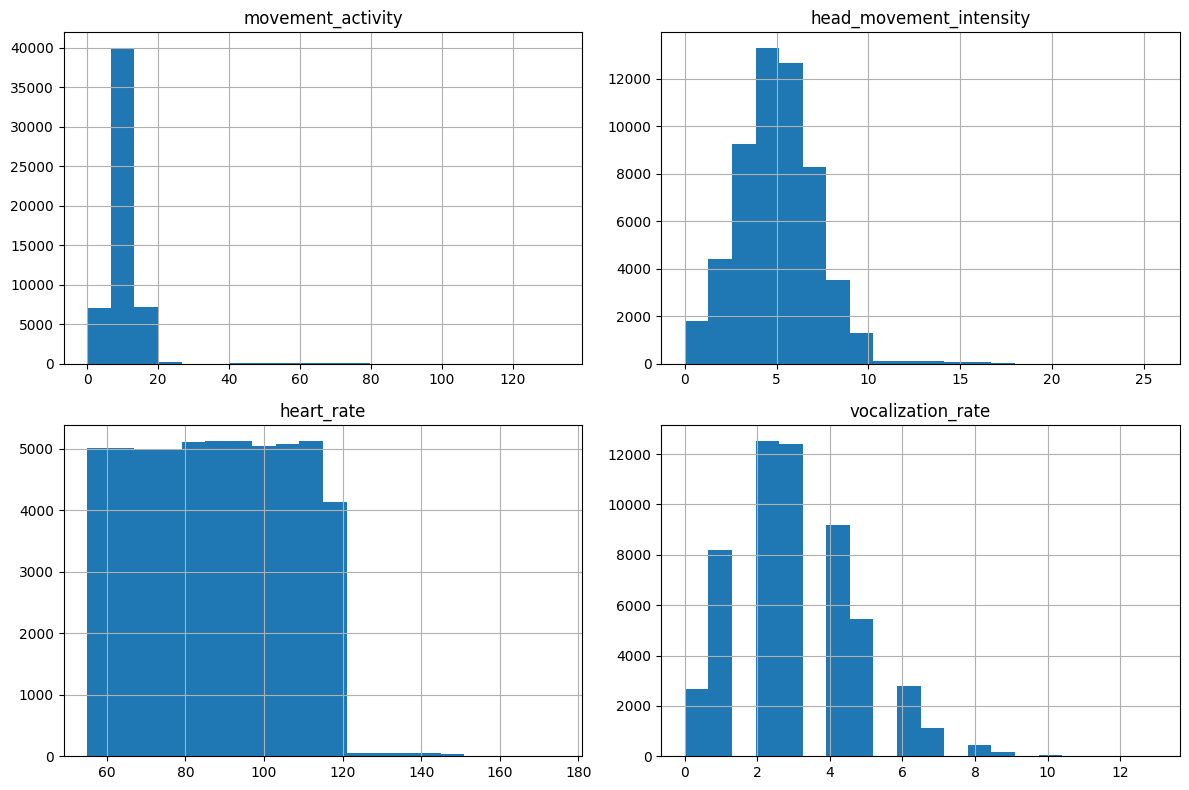

In [10]:
columns_to_plot = sensor_df.drop(columns=["cow_id","timestamp", "location_lat", "location_lon","earthquake_detected"]).select_dtypes(include="number")

columns_to_plot.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# looking for outliers

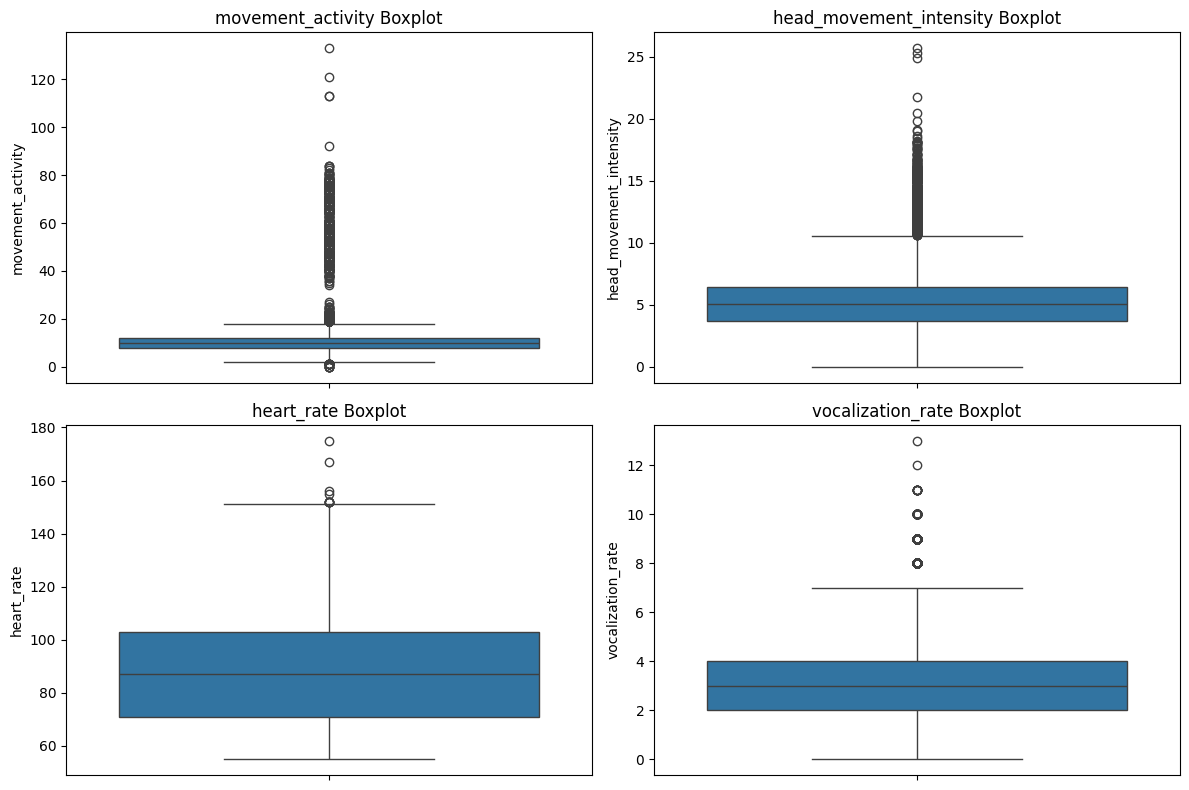

In [11]:
features = ["movement_activity", "head_movement_intensity", "heart_rate", "vocalization_rate"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=sensor_df[col])
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()

# There are some outliers in the data, but they don’t appear to be caused by any errors or issues. Instead, they seem to reflect relevant real-world events

# Correlation Heatmap 

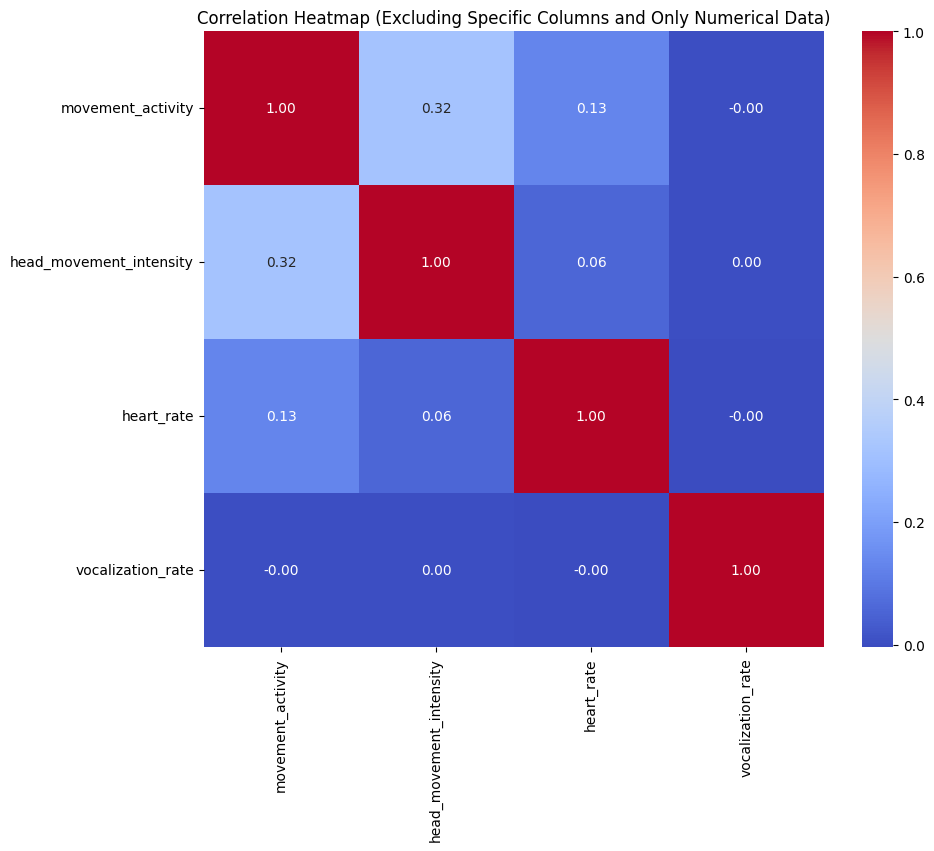

In [12]:
columns_to_drop = ["cow_id", "timestamp", "location_lat", "location_lon", "earthquake_detected"]
df_cleaned = sensor_df.drop(columns=columns_to_drop)

# Select only numerical columns
df_numerical = df_cleaned.select_dtypes(include="number")

# Calculate the correlation matrix for the numerical columns
correlation_matrix = df_numerical.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

# Display the heatmap
plt.title("Correlation Heatmap (Excluding Specific Columns and Only Numerical Data)")
plt.show()

In [13]:
merged_df = pd.merge(sensor_df, cow_info_df, on=["cow_id", "cow_id"], how="inner") #merging both df's based on cow_id



In [14]:
merged_df

,cow_id,timestamp,location_lat,location_lon,movement_activity,head_movement_intensity,heart_rate,vocalization_rate,earthquake_detected,country,lat,lon,breed,age,weight_kg
0,1,2025-01-04 00:00:00,51.213409,10.783267,11.0,4.964210,80.0,4.0,1,Germany,51.213263,10.783827,Holstein,7,714
1,1,2025-01-04 00:01:00,51.212906,10.783898,6.0,3.047200,80.0,4.0,0,Germany,51.213263,10.783827,Holstein,7,714
2,1,2025-01-04 00:02:00,51.214196,10.782943,13.0,4.909491,88.0,2.0,0,Germany,51.213263,10.783827,Holstein,7,714
3,1,2025-01-04 00:03:00,51.213500,10.783989,12.0,2.533797,62.0,2.0,0,Germany,51.213263,10.783827,Holstein,7,714
4,1,2025-01-04 00:04:00,51.212667,10.783753,13.0,7.781945,64.0,4.0,0,Germany,51.213263,10.783827,Holstein,7,714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,40,2025-01-04 22:50:00,56.555723,-107.001665,14.0,3.913371,101.0,1.0,1,Canada,56.555361,-107.002462,Guernsey,7,403
54996,40,2025-01-04 22:51:00,56.556091,-107.002881,6.0,4.135560,88.0,1.0,0,Canada,56.555361,-107.002462,Guernsey,7,403
54997,40,2025-01-04 22:52:00,56.555969,-107.001723,10.0,5.575292,84.0,1.0,0,Canada,56.555361,-107.002462,Guernsey,7,403
54998,40,2025-01-04 22:53:00,56.555475,-107.002273,11.0,4.666576,62.0,1.0,1,Canada,56.555361,-107.002462,Guernsey,7,403


In [15]:
columns_to_drop = ["location_lat", "location_lon","cow_id","lat","lon"] #removing unwanted columns
merged_df = merged_df.drop(columns=columns_to_drop) 

In [16]:
merged_df

,timestamp,movement_activity,head_movement_intensity,heart_rate,vocalization_rate,earthquake_detected,country,breed,age,weight_kg
0,2025-01-04 00:00:00,11.0,4.964210,80.0,4.0,1,Germany,Holstein,7,714
1,2025-01-04 00:01:00,6.0,3.047200,80.0,4.0,0,Germany,Holstein,7,714
2,2025-01-04 00:02:00,13.0,4.909491,88.0,2.0,0,Germany,Holstein,7,714
3,2025-01-04 00:03:00,12.0,2.533797,62.0,2.0,0,Germany,Holstein,7,714
4,2025-01-04 00:04:00,13.0,7.781945,64.0,4.0,0,Germany,Holstein,7,714
...,...,...,...,...,...,...,...,...,...,...
54995,2025-01-04 22:50:00,14.0,3.913371,101.0,1.0,1,Canada,Guernsey,7,403
54996,2025-01-04 22:51:00,6.0,4.135560,88.0,1.0,0,Canada,Guernsey,7,403
54997,2025-01-04 22:52:00,10.0,5.575292,84.0,1.0,0,Canada,Guernsey,7,403
54998,2025-01-04 22:53:00,11.0,4.666576,62.0,1.0,1,Canada,Guernsey,7,403


In [17]:
# Ensure timestamp is in datetime format, moving from timestamp to time_of_day
merged_df["timestamp"] = pd.to_datetime(merged_df["timestamp"])

# Extract hour
merged_df["hour"] = merged_df["timestamp"].dt.hour

# Define time-of-day categories
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "morning"
    elif 12 <= hour < 17:
        return "afternoon"
    elif 17 <= hour < 21:
        return "evening"
    else:
        return "night"

merged_df["time_of_day"] = merged_df["hour"].apply(get_time_of_day)

# Drop original timestamp and hour columns
merged_df = merged_df.drop(columns=["timestamp", "hour"])

In [18]:
merged_df

,movement_activity,head_movement_intensity,heart_rate,vocalization_rate,earthquake_detected,country,breed,age,weight_kg,time_of_day
0,11.0,4.964210,80.0,4.0,1,Germany,Holstein,7,714,night
1,6.0,3.047200,80.0,4.0,0,Germany,Holstein,7,714,night
2,13.0,4.909491,88.0,2.0,0,Germany,Holstein,7,714,night
3,12.0,2.533797,62.0,2.0,0,Germany,Holstein,7,714,night
4,13.0,7.781945,64.0,4.0,0,Germany,Holstein,7,714,night
...,...,...,...,...,...,...,...,...,...,...
54995,14.0,3.913371,101.0,1.0,1,Canada,Guernsey,7,403,night
54996,6.0,4.135560,88.0,1.0,0,Canada,Guernsey,7,403,night
54997,10.0,5.575292,84.0,1.0,0,Canada,Guernsey,7,403,night
54998,11.0,4.666576,62.0,1.0,1,Canada,Guernsey,7,403,night


# Model Training


--- Testing SMOTE ---

Training LogisticRegression with SMOTE
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
F1 Score: 0.2408
ROC AUC: 0.5963
Sensitivity (Recall): 0.5546
Specificity: 0.5807

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.58      0.71      9671
           1       0.15      0.55      0.24      1329

    accuracy                           0.58     11000
   macro avg       0.53      0.57      0.47     11000
weighted avg       0.81      0.58      0.65     11000

Confusion Matrix:
[[5616 4055]
 [ 592  737]]

Training RandomForest with SMOTE
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 20, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 5, 'classifier__n_estimators': 100}
F1 Score: 0.1703
ROC AUC: 0.5605
Sensitivity (R

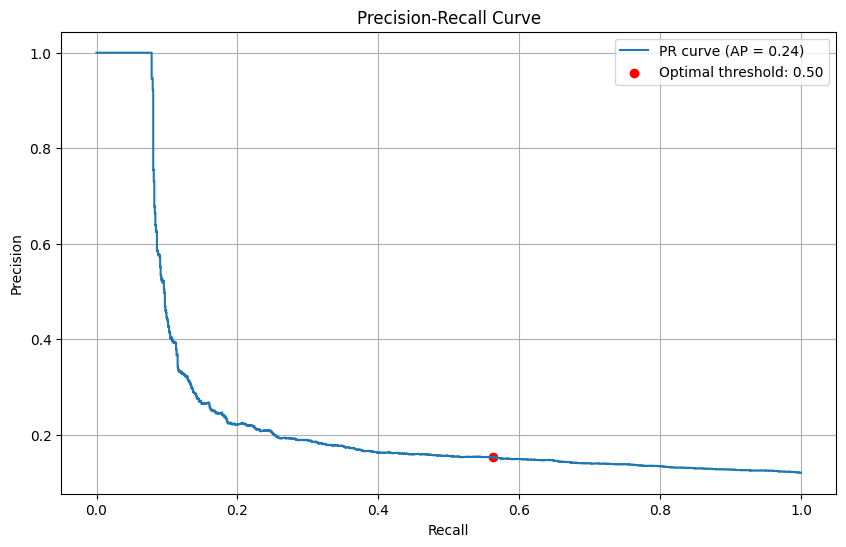

['model.pkl']

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
from imblearn.metrics import sensitivity_specificity_support
import joblib

# Assuming merged_df is your actual DataFrame
X = merged_df.drop(columns=["earthquake_detected"])  # Remove target column
y = merged_df["earthquake_detected"]  # Set the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Enhanced preprocessing pipeline with more robust scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', PowerTransformer(method='yeo-johnson'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# 1. Try different sampling techniques
samplers = {
    'SMOTE': SMOTE(sampling_strategy=0.5, random_state=42),  # Increase minority class but not to full equality
    'BorderlineSMOTE': BorderlineSMOTE(sampling_strategy=0.5, random_state=42),
    'ADASYN': ADASYN(sampling_strategy=0.5, random_state=42)
}

# 2. Try more models with better hyperparameter tuning
models = {
    'LogisticRegression': (LogisticRegression(max_iter=10000, class_weight='balanced'),
                          {'classifier__C': [0.01, 0.1, 1, 10],
                           'classifier__penalty': ['l1', 'l2'],
                           'classifier__solver': ['liblinear']}),
                           
    'RandomForest': (RandomForestClassifier(random_state=42, class_weight='balanced'),
                    {'classifier__n_estimators': [100, 200],
                     'classifier__max_depth': [20, 30, None],
                     'classifier__min_samples_leaf': [1, 2, 5],
                     'classifier__max_features': ['sqrt', 'log2']}),
                     
    'GradientBoosting': (GradientBoostingClassifier(random_state=42),
                        {'classifier__n_estimators': [100, 200],
                         'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [3, 5],
                         'classifier__subsample': [0.8, 1.0]})
}

# 3. Use custom scoring metric focused on the minority class
scoring = {
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
}

# 4. Stratified K-fold to maintain class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Track best models for each sampling technique
best_results = {}

# Train and evaluate models with different samplers
for sampler_name, sampler in samplers.items():
    print(f"\n--- Testing {sampler_name} ---")
    
    for model_name, (model, param_grid) in models.items():
        print(f"\nTraining {model_name} with {sampler_name}")
        
        # Create pipeline with current sampler and model
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('sampling', sampler),
            ('classifier', model)
        ])
        
        # Grid search with focus on F1 score
        grid_search = GridSearchCV(
            pipeline, param_grid, cv=cv, 
            scoring='f1', n_jobs=-1, verbose=1
        )
        
        # Fit model
        grid_search.fit(X_train, y_train)
        
        # Get best model
        best_model = grid_search.best_estimator_
        
        # Make predictions
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
        sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
        
        # Store results
        result_key = f"{sampler_name}_{model_name}"
        best_results[result_key] = {
            'model': best_model,
            'best_params': grid_search.best_params_,
            'f1': f1,
            'roc_auc': roc_auc,
            'sensitivity': sensitivity,  # Recall for positive class
            'specificity': specificity,  # Recall for negative class
            'y_pred': y_pred,
            'y_prob': y_prob
        }
        
        # Print results
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"F1 Score: {f1:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        print(f"Sensitivity (Recall): {sensitivity:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        # Print confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)

# Find the best overall model based on F1 score
best_model_key = max(best_results, key=lambda k: best_results[k]['f1'])
print(f"\n\nBest overall model: {best_model_key}")
print(f"F1 Score: {best_results[best_model_key]['f1']:.4f}")
print(f"Best parameters: {best_results[best_model_key]['best_params']}")

# 5. Find optimal probability threshold for the best model
best_y_prob = best_results[best_model_key]['y_prob']
precision, recall, thresholds = precision_recall_curve(y_test, best_y_prob)

# Find threshold that maximizes F1 score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Add small epsilon to avoid division by zero
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]

print(f"\nOptimal probability threshold: {best_threshold:.4f}")
y_pred_optimal = (best_y_prob >= best_threshold).astype(int)
print("\nClassification Report with optimal threshold:")
print(classification_report(y_test, y_pred_optimal))

# Plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'PR curve (AP = {average_precision_score(y_test, best_y_prob):.2f})')
plt.scatter(recall[best_threshold_idx], precision[best_threshold_idx], color='red', 
            label=f'Optimal threshold: {best_threshold:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
joblib.dump(best_results[best_model_key]['model'], "model.pkl")